# Analyzing K-Pop Using Machine Learning (PART III)

[Import Data](https://www.youtube.com/watch?v=oGkTDws9-0Y)

## Model Building

### Import modules

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Import data

In [2]:
df = pd.read_csv('fix_final_clean_kpop.csv')

In [3]:
df.columns

Index(['fav_group', 'popl_by_country', 'reason', 'yr_litened', 'gender_pref',
       'daily_music_hr', 'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev', 'age',
       'country', 'job', 'gender', 'num_grp_like', 'bts_vs_others'],
      dtype='object')

In [4]:
# Subset relevant columns for model

df_model = df[['popl_by_country', 'reason', 'yr_litened', 'gender_pref',
       'daily_music_hr', 'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev', 'age',
       'country', 'job', 'gender', 'num_grp_like', 'bts_vs_others']]

In [6]:
# Get dummy data to convert categorical variable into dummy/indicator variable

df_dummy = pd.get_dummies(df_model)
df_dummy

,yr_litened,daily_music_hr,daily_MV_hr,yr_merch_spent,age,num_grp_like,popl_by_country_i'm not sure,popl_by_country_its gaining popularity,popl_by_country_no,popl_by_country_yes,...,country_uk,country_usa,job_full-time worker,job_student,job_unemployed,gender_female,gender_male,gender_transgender,bts_vs_others_bts,bts_vs_others_other(s)
0,1.5,5.0,2.5,75,18,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1,3.5,3.0,2.5,50,18,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,4.0,3.0,2.5,75,18,2,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,3.5,5.0,3.5,75,24,1,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
4,3.5,5.0,2.5,150,18,1,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,3.5,5.0,3.5,0,18,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
236,4.0,3.0,2.5,500,18,1,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
237,1.0,5.0,2.5,0,12,2,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
238,4.0,3.0,2.5,50,18,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0


## Train and Test Split

In [7]:
from sklearn.model_selection import train_test_split

X = df_dummy.drop('daily_music_hr', axis=1)
y = df_dummy.daily_music_hr.values # Creates array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Multiple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize linear regression model
linreg = LinearRegression()

# Train the model
linreg.fit(X_train, y_train)

# Perform predictions
y_pred = linreg.predict(X_test)

# Performnce metrics
print("Coefficients:", linreg.coef_)
print("Intercept:", linreg.intercept_)
print("Mean absolute error (MAE): %.2f" % mean_absolute_error(y_test, y_pred))

Coefficients: [ 2.27758588e-03  1.04295399e-01  5.88379219e-03 -9.76004748e-02
  1.24103098e-01  3.31651599e-01  7.65490896e-01 -1.94512183e+00
  8.47979338e-01 -2.47585285e+00  5.74599968e-01  1.23633128e+00
  6.64921603e-01  5.51602046e-02 -3.19453313e-01  3.09505673e-01
 -4.52125648e-02  6.85466938e-01 -6.85466938e-01 -9.94281199e-02
 -2.17373428e-01  3.16801548e-01 -1.22938940e-01 -3.70810459e-02
  1.60019986e-01  1.34747648e-01 -2.88251271e+00  4.36445856e-01
 -6.10848606e-01  1.00592395e+00  1.91624386e+00 -7.45679675e-03
 -2.07362227e-01  2.14819024e-01 -7.03085365e-01 -9.44351195e-02
  2.49735329e+00 -8.55765084e-01 -8.44067726e-01  5.90525616e-01
 -5.09100665e-01 -5.27980000e-01  4.46555049e-01 -3.29131462e-01
 -3.93112886e-03  3.33062591e-01  2.07424085e-01 -6.57948664e-02
 -1.41629218e-01 -3.44347492e-01  2.87727346e-01  5.66201465e-02
 -3.06550977e-01  2.07685262e-01  6.24217844e-01 -3.29058880e-01
  2.46815812e-02 -8.67744288e-01 -1.31918073e-01  1.06300560e+00
  2.6333454

In [9]:
np.min(df.daily_music_hr)

0.5

In [ ]:
# Check MLR's performance using 10 fold cross validation

from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(linreg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10))

-1.9484724515451872

## Lasso Regression (L1 Regularization)

In [12]:
from sklearn.linear_model import Lasso

lm_las = Lasso()
lm_las.fit(X_train, y_train)
np.mean(cross_val_score(lm_las, X_train, y_train, scoring='neg_mean_absolute_error', cv=10))

-1.5793841855417101

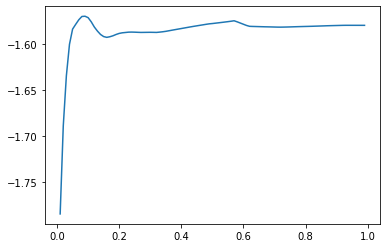

In [17]:
alpha = []
err = []

for i in range(1, 100):
    alpha.append(i/100)
    lm_lasso = Lasso(alpha=(i/100))
    err.append(np.mean(cross_val_score(lm_lasso, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)))

plt.plot(alpha, err)

In [18]:
err = tuple(zip(alpha, err))
df_error = pd.DataFrame(err, columns=['alpha', 'err'])
df_error[df_error.err == max(df_error.err)]

,alpha,err
8,0.09,-1.569488


In [20]:
lm_las = Lasso(alpha=0.09)
lm_las.fit(X_train, y_train)
np.mean(cross_val_score(lm_las, X_train, y_train, scoring='neg_mean_absolute_error', cv=10))

-1.5694876958868376

## Ridge Regression (L2 Regularization)

In [21]:
from sklearn.linear_model import Ridge

lm_rid = Ridge()
lm_rid.fit(X_train, y_train)
np.mean(cross_val_score(lm_rid, X_train, y_train, scoring='neg_mean_absolute_error', cv=10))

-1.8538924358246949

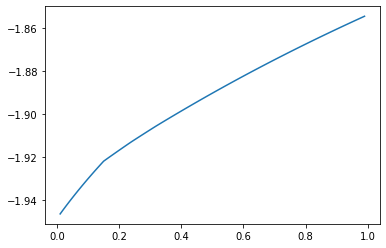

In [22]:
alpha = []
err = []

for i in range(1, 100):
    alpha.append(i/100)
    lm_ridge = Ridge(alpha=(i/100))
    err.append(np.mean(cross_val_score(lm_ridge, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)))

plt.plot(alpha, err)

## Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)

np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10))

-1.610916471528895

In [24]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': range(10, 100, 10), 'criterion': ('mse', 'mae'), 'max_features': ('auto', 'sqrt', 'log2')}

gs_rf = GridSearchCV(rf, params, scoring='neg_mean_absolute_error', cv=10)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=2,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=No

In [25]:
gs_rf.best_score_

-1.503121052631579

In [26]:
gs_rf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## XGBoost

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from xgboost import XGBClassifier

# Initialize XGB Model
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

np.mean(cross_val_score(xgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=10))

[03:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:28:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:28:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

-1.6313157894736843

### GridSearchCV for XGBoost

In [30]:
params = {'min_child_weight': [3, 5], 'gamma':[0.5, 1], 'subsample': [0.8, 1.0],
          'colsample_bytree': [0.6, 0.8], 'max_depth': [1,2]}

gs_xgb = GridSearchCV(xgb, params, scoring='neg_mean_absolute_error', cv=10)
gs_xgb.fit(X_train, y_train)

[03:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jo...
                                     scale_pos_weight=None, subsample=1,
                                     tree_method='exact',
                                     use_label_encoder=True,
                                     validate_parameters=1, verbosity=None),
             

In [31]:
gs_xgb.best_score_

-1.3676315789473683

In [32]:
gs_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1.0,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

## Model Performance Comparison

In [33]:
linreg_pred = linreg.predict(X_test)
lm_las_pred = lm_las.predict(X_test)
lm_rid_pred = lm_rid.predict(X_test)
rf_pred = gs_rf.best_estimator_.predict(X_test)
xgb_pred = gs_xgb.best_estimator_.predict(X_test)

In [34]:
print("MLR MAE:", mean_absolute_error(y_test, linreg_pred))
print("Lasso Regression MAE:", mean_absolute_error(y_test, lm_las_pred))
print("Ridge Regression MAE:", mean_absolute_error(y_test, lm_rid_pred))
print("Random Forest MAE:", mean_absolute_error(y_test, rf_pred))
print("XGBoost MAE:", mean_absolute_error(y_test, xgb_pred))

MLR MAE: 2.164327676473372
Lasso Regression MAE: 1.5693248654418126
Ridge Regression MAE: 1.899316585560822
Random Forest MAE: 1.3879166666666667
XGBoost MAE: 1.3333333333333333


## XGBoost is the best model in this case